In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv( '/content/gdrive/MyDrive/A_GoogleColab/TSLA_p.csv')

In [ ]:
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,target(P21)
0,4.778,4.766,4.392,3.840,3.222,3.160,3.492,3.480,3.410,3.628,3.968,3.978,4.128,4.382,4.060,4.044,4.200,4.258,4.190,4.110,93831500.0,85935500.0,41094000.0,25699000.0,34334500.0,34608500.0,38557000.0,20253000.0,11012500.0,13400500.0,20976000.0,18699000.0,13106500.0,12432500.0,9126500.0,6262500.0,4789000.0,3268000.0,4611000.0,3098500.0,4.144
1,4.766,4.392,3.840,3.222,3.160,3.492,3.480,3.410,3.628,3.968,3.978,4.128,4.382,4.060,4.044,4.200,4.258,4.190,4.110,4.144,85935500.0,41094000.0,25699000.0,34334500.0,34608500.0,38557000.0,20253000.0,11012500.0,13400500.0,20976000.0,18699000.0,13106500.0,12432500.0,9126500.0,6262500.0,4789000.0,3268000.0,4611000.0,3098500.0,2336000.0,4.070
2,4.392,3.840,3.222,3.160,3.492,3.480,3.410,3.628,3.968,3.978,4.128,4.382,4.060,4.044,4.200,4.258,4.190,4.110,4.144,4.070,41094000.0,25699000.0,34334500.0,34608500.0,38557000.0,20253000.0,11012500.0,13400500.0,20976000.0,18699000.0,13106500.0,12432500.0,9126500.0,6262500.0,4789000.0,3268000.0,4611000.0,3098500.0,2336000.0,3080000.0,3.988
3,3.840,3.222,3.160,3.492,3.480,3.410,3.628,3.968,3.978,4.128,4.382,4.060,4.044,4.200,4.258,4.190,4.110,4.144,4.070,3.988,25699000.0,34334500.0,34608500.0,38557000.0,20253000.0,11012500.0,13400500.0,20976000.0,18699000.0,13106500.0,12432500.0,9126500.0,6262500.0,4789000.0,3268000.0,4611000.0,3098500.0,2336000.0,3080000.0,2134500.0,4.184
4,3.222,3.160,3.492,3.480,3.410,3.628,3.968,3.978,4.128,4.382,4.060,4.044,4.200,4.258,4.190,4.110,4.144,4.070,3.988,4.184,34334500.0,34608500.0,38557000.0,20253000.0,11012500.0,13400500.0,20976000.0,18699000.0,13106500.0,12432500.0,9126500.0,6262500.0,4789000.0,3268000.0,4611000.0,3098500.0,2336000.0,3080000.0,2134500.0,3590500.0,4.390


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop( 'target(P21)', axis = 1).values
y = df[ 'target(P21)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3)

In [ ]:
print( X_train.shape)
print( X_test.shape)

(2025, 40)
(868, 40)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit( X_train)
# Only fit with trainning set because do not want to have data in the test set

MinMaxScaler()

In [ ]:
X_train = scaler.transform( X_train)
X_test = scaler.transform( X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add( Dense( 40, activation = 'relu'))
model.add( Dense( 20, activation = 'relu'))
model.add( Dense( 10, activation = 'relu'))
model.add( Dense( 1))

model.compile( optimizer = 'rmsprop', loss = 'mse')

In [ ]:
model.fit( x = X_train, y = y_train, epochs = 500, batch_size = 50, verbose = 1, validation_data = (X_test, y_test)) # Go through the data set 250 times

Epoch 1/500
41/41 [==============================] - 1s 7ms/step - loss: 70530.6953 - val_loss: 74213.0625
Epoch 2/500
41/41 [==============================] - 0s 2ms/step - loss: 69253.0859 - val_loss: 72234.5000
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 66733.8594 - val_loss: 68529.9609
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 62085.9062 - val_loss: 62000.5820
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 55006.5664 - val_loss: 53373.2773
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 45589.1406 - val_loss: 42184.9414
Epoch 7/500
41/41 [==============================] - 0s 2ms/step - loss: 34772.6836 - val_loss: 30190.2168
Epoch 8/500
41/41 [==============================] - 0s 3ms/step - loss: 24704.7266 - val_loss: 20800.3516
Epoch 9/500
41/41 [==============================] - 0s 2ms/step - loss: 16131.9434 - val_loss: 12747.0811
Epoch 10/500
41/41 [=================

(0.0, 2000.0)

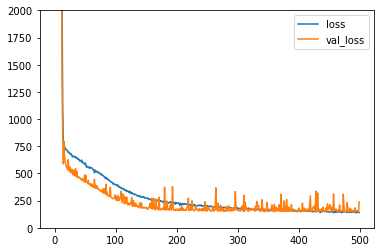

In [ ]:
loss_df = pd.DataFrame( model.history.history)
ax1 = loss_df.plot()
ax1.set_ylim( 0, 2000)

In [ ]:
model.evaluate( X_test, y_test, verbose = 0)

238.37582397460938

In [ ]:
test_predictions = model.predict( X_test)

In [ ]:
test_predictions = pd.Series( test_predictions.reshape( 868,))

In [ ]:
pred_df = pd.DataFrame( y_test, columns = [ 'Test True Y'])

In [ ]:
pred_df = pd.concat( [pred_df, test_predictions], axis = 1)

In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

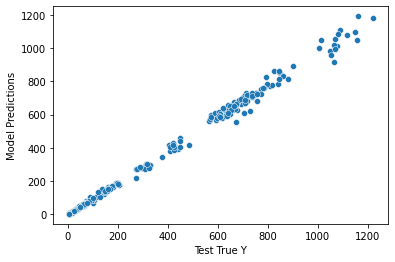

In [ ]:
sns.scatterplot( x = 'Test True Y', y = 'Model Predictions', data = pred_df)

In [ ]:
df[ 'target(P21)'].describe()

count    2893.000000
mean      128.706411
std       235.629572
min         3.520000
25%        20.129999
50%        46.358002
75%        67.098000
max      1229.910034
Name: target(P21), dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print( mean_absolute_error( pred_df[ 'Test True Y'], pred_df[ 'Model Predictions']))
print( mean_squared_error( pred_df[ 'Test True Y'], pred_df[ 'Model Predictions']))

7.914464982006689
238.37579484503792
